# MTA 1 Exercise

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

## Exercise 1

- Open up a new IPython notebook
- Download MTA turnstile data files for the following three dates: ```160903, 160910, 160917```

- Load the files into a pandas DataFrame (hint: `pd.read_csv()` to load files and `pd.concat()` to combine DataFrames)


In [5]:
one = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160903.txt")
two = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160910.txt")
three = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160917.txt")

In [6]:
df = pd.concat([one, two, three], join="inner", ignore_index=True)

In [7]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


## Exercise 2

- Let's turn this into a time series.

- Our pandas dataframe has columns called `Date` and `Time` (what datatype did pandas assign to these columns on import?). However, in python and pandas we can convert date and time information to _datetime_ objects, which allow us to do time-based operations

- Using either [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) in pandas or the [python datetime library](https://docs.python.org/2/library/datetime.html), combine the `Date` and `Time` columns into a single new column of the datetime datatype

In [8]:
df.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

Pandas assigned an `object` (i.e. string) type to the `DATE` and `TIME` columns on import.

To begin with for data cleaning, I will clean the column names to make it easier to wrangle later on.

In [9]:
df.columns = [column.strip() for column in df.columns] 
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [11]:
df['DATE_TIME'] = pd.to_datetime(df.DATE + ' ' + df.TIME, format="%m/%d/%Y %H:%M:%S")

In [12]:
df.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE                 object
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
DATE_TIME    datetime64[ns]
dtype: object

The `date_time` column is now a datetime object.

## Remove duplicates

In [13]:
# Get rid of the duplicate entry
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [15]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387266,R155,R116,01-00-03,50 ST,2016-09-16 04:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1
387261,R155,R116,01-00-03,50 ST,2016-09-15 08:00:00,1
387262,R155,R116,01-00-03,50 ST,2016-09-15 12:00:00,1


## Exercise 3a
* Each combination of C/A, UNIT, SCP, and STATION represents a unique turnstile. Take a look at one specific turnstile on a specific date. What does each row in the dataframe represent?
* Obtain the maximum ENTRIES value for each day, for each unique turnstile.

To look at a specifc turnstile, I'll use a mask. 

In [16]:
mask = ((df["C/A"] == "A002") &
        (df["UNIT"] == "R051") & 
        (df["SCP"] == "02-00-00") & 
        (df["STATION"] == "59 ST"))

df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
388058,A002,R051,02-00-00,59 ST,NQR456,BMT,09/16/2016,20:00:00,REGULAR,5827597,1975461,2016-09-16 20:00:00
388057,A002,R051,02-00-00,59 ST,NQR456,BMT,09/16/2016,16:00:00,REGULAR,5826719,1975390,2016-09-16 16:00:00
388056,A002,R051,02-00-00,59 ST,NQR456,BMT,09/16/2016,12:00:00,REGULAR,5826346,1975308,2016-09-16 12:00:00
388055,A002,R051,02-00-00,59 ST,NQR456,BMT,09/16/2016,08:00:00,REGULAR,5826171,1975014,2016-09-16 08:00:00
388054,A002,R051,02-00-00,59 ST,NQR456,BMT,09/16/2016,04:00:00,REGULAR,5826120,1974885,2016-09-16 04:00:00


It looks like, for a unique turnstile, each row represents a 4 hour window for a specific day with the total number of CUMULATIVE entries and exits at that point. 

As per the question, let's filter for the maximum entries in a four hour window per day and call that new dataframe `df_daily`. The last reading for each day is the maximum number of entries, therefore we would filter for the last row in each day. 

In [22]:
df_daily = (df
            .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
            .ENTRIES.first())

In [23]:
df_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383
...,...,...,...,...,...,...
95997,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/12/2016,5554
95998,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/13/2016,5554
95999,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/14/2016,5554
96000,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/15/2016,5554


## Exercise 3b

- Work off of the daily maximum `ENTRIES` calculations from Problem 3a. Recall that the `ENTRIES` column contains cumulative entries on each day. We would now like you to calculate daily entries, i.e. the number of new entries gained each day
- Hint: Group the data by turnstile and use the Pandas `.apply()` method to compute the same differencing function for each turnstile. Check out the `.shift()` and `.diff()` DataFrame methods for this purpose
- Look through your results. Do they all make sense?

To calculate daily entries, I have to deduct the former day's cumulative entries from each row's `entries` column. I can do this by using `.apply()` to apply a single function for each turnstile.

In [26]:
df_daily[["PREV_DATE", "PREV_ENTRIES"]] = (df_daily
                                           .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                           .apply(lambda grp: grp.shift(1)))

/var/folders/fn/01g6402n52j2vlccb_xrqvgw0000gn/T/ipykernel_26361/985758883.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_daily[["PREV_DATE", "PREV_ENTRIES"]] = (df_daily


In [27]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0


I will remove the NaN value for the first row for each turnstile.

In [29]:
df_daily.dropna(subset=['PREV_DATE'], inplace=True)

In [30]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5805383.0


### Reverse counter

In [31]:
df_daily['DAILY_ENTRIES'] = df_daily['ENTRIES'] - df_daily['PREV_ENTRIES']

In [32]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0,677.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0,1538.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0,1539.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0,1508.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5805383.0,1607.0


Now let's see if there's anything funky with the `daily_entries` column.

In [33]:
(df_daily[df_daily['DAILY_ENTRIES'] < 0]
 .groupby(["C/A", "UNIT", "SCP", "STATION"])).head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
715,A011,R080,01-00-00,57 ST-7 AV,08/28/2016,887688133,08/27/2016,8.876896e+08,-1475.0
716,A011,R080,01-00-00,57 ST-7 AV,08/29/2016,887685714,08/28/2016,8.876881e+08,-2419.0
717,A011,R080,01-00-00,57 ST-7 AV,08/30/2016,887683207,08/29/2016,8.876857e+08,-2507.0
718,A011,R080,01-00-00,57 ST-7 AV,08/31/2016,887680260,08/30/2016,8.876832e+08,-2947.0
719,A011,R080,01-00-00,57 ST-7 AV,09/01/2016,887677354,08/31/2016,8.876803e+08,-2906.0
...,...,...,...,...,...,...,...,...,...
94554,R646,R110,01-00-01,FLATBUSH AV-B.C,08/28/2016,1508334747,08/27/2016,1.508335e+09,-400.0
94555,R646,R110,01-00-01,FLATBUSH AV-B.C,08/29/2016,1508332956,08/28/2016,1.508335e+09,-1791.0
94556,R646,R110,01-00-01,FLATBUSH AV-B.C,08/30/2016,1508330989,08/29/2016,1.508333e+09,-1967.0
94557,R646,R110,01-00-01,FLATBUSH AV-B.C,08/31/2016,1508329012,08/30/2016,1.508331e+09,-1977.0


Looks like there are negative values for `daily_entries` -- possibly because the previous day's entries are higher than the current day. Let's see how many rows this is happening for.

In [34]:
df_daily[df_daily['ENTRIES'] < df_daily['PREV_ENTRIES']].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
715,A011,R080,01-00-00,57 ST-7 AV,08/28/2016,887688133,08/27/2016,887689608.0,-1475.0
716,A011,R080,01-00-00,57 ST-7 AV,08/29/2016,887685714,08/28/2016,887688133.0,-2419.0
717,A011,R080,01-00-00,57 ST-7 AV,08/30/2016,887683207,08/29/2016,887685714.0,-2507.0
718,A011,R080,01-00-00,57 ST-7 AV,08/31/2016,887680260,08/30/2016,887683207.0,-2947.0
719,A011,R080,01-00-00,57 ST-7 AV,09/01/2016,887677354,08/31/2016,887680260.0,-2906.0


Let's look at a specific instance of 2 consecutive days to see what is happening.

In [35]:
mask3 = ((df["C/A"] == "A011") &
        (df["UNIT"] == "R080") & 
        (df["SCP"] == "01-00-00") & 
        (df["STATION"] == "57 ST-7 AV") &
        ((df["DATE"] == "08/28/2016") |
        (df["DATE"] == "08/29/2016")))

df[mask3]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1458,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/29/2016,20:00:00,REGULAR,887685714,493414628,2016-08-29 20:00:00
1457,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/29/2016,16:00:00,REGULAR,887686777,493414944,2016-08-29 16:00:00
1456,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/29/2016,12:00:00,REGULAR,887687246,493415359,2016-08-29 12:00:00
1455,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/29/2016,08:00:00,REGULAR,887687693,493416556,2016-08-29 08:00:00
1454,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/29/2016,04:00:00,REGULAR,887687796,493416991,2016-08-29 04:00:00
1453,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/29/2016,00:00:00,REGULAR,887687859,493417025,2016-08-29 00:00:00
1452,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/28/2016,20:00:00,REGULAR,887688133,493417232,2016-08-28 20:00:00
1451,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/28/2016,16:00:00,REGULAR,887688500,493417607,2016-08-28 16:00:00
1450,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/28/2016,12:00:00,REGULAR,887688820,493418160,2016-08-28 12:00:00
1449,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/28/2016,08:00:00,REGULAR,887689047,493418585,2016-08-28 08:00:00


The counter seems to be working in reverse, so I will assume we can just take the inverse sign of the `daily_entries` column for the rows which have negative values.

In [38]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
df_daily["DAILY_ENTRIES"] = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


In [39]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0,677.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0,1538.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0,1539.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0,1508.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5805383.0,1607.0


### Problem 4

So far we've been operating on a single turnstile level. Now let's
  combine turnstiles that fall within the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstiles -- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together. For each
ControlArea/UNIT/STATION combo, for each day, sum the counts from each
turnstile belonging to that combo. (hint: `pd.groupby`)

In [40]:
df_unit_station_daily = df_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()

In [41]:
df_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,08/28/2016,7896.0
1,A002,R051,59 ST,08/29/2016,15462.0
2,A002,R051,59 ST,08/30/2016,16622.0
3,A002,R051,59 ST,08/31/2016,16557.0
4,A002,R051,59 ST,09/01/2016,16464.0


### Problem 5

Similarly, come up with daily time series for each STATION, by adding up all the turnstiles in a station.

In [44]:
df_station_daily = df_unit_station_daily.groupby(['STATION', 'DATE'])[['DAILY_ENTRIES']].sum().reset_index()
df_station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,08/28/2016,13871.0
1,1 AV,08/29/2016,18064.0
2,1 AV,08/30/2016,19182.0
3,1 AV,08/31/2016,19616.0
4,1 AV,09/01/2016,20170.0


### Problem 6

Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate.

In [46]:
station_totals = df_unit_station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,2874102.0
1,GRD CNTRL-42 ST,2477058.0
2,34 ST-HERALD SQ,2069243.0
3,23 ST,2054576.0
4,CANAL ST,1947344.0


### Problem 7
We will plot the daily time series for a single turnstile.

In [285]:
single_turnstile_mask = ((df_daily["C/A"] == "A002") &
        (df_daily["UNIT"] == "R051") & 
        (df_daily["SCP"] == "02-00-00") & 
        (df_daily["STATION"] == "59 ST"))

single_turnstile = df_daily[single_turnstile_mask]
single_turnstile.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0,677.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0,1538.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0,1539.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0,1508.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5805383.0,1607.0


Text(0, 0.5, 'Entries')

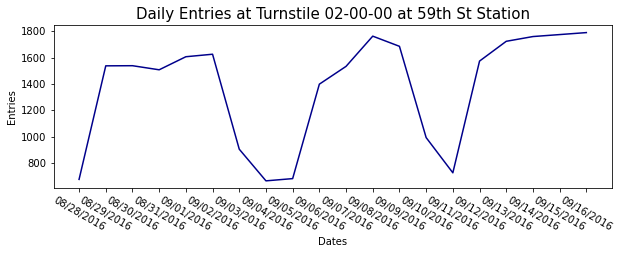

In [286]:
%matplotlib inline

plt.figure(figsize=(10,3))
plt.plot(single_turnstile.DATE, single_turnstile.DAILY_ENTRIES, color='darkblue')
plt.title('Daily Entries at Turnstile 02-00-00 at 59th St Station', fontsize=15)
plt.xlabel('Dates')
plt.xticks(rotation=-30)
plt.ylabel('Entries')

It looks like there are dips on a couple of days a week -- probably because those days are weekends.

In [354]:
single_turnstile['DATE'] = pd.to_datetime(single_turnstile['DATE'])
single_turnstile['DAY'] = single_turnstile['DATE'].apply(lambda x: dt.strftime(x, '%w'))
single_turnstile['DAY_NAME'] = single_turnstile['DATE'].apply(lambda x: dt.strftime(x, '%a'))



/var/folders/fn/01g6402n52j2vlccb_xrqvgw0000gn/T/ipykernel_26361/1793934853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_turnstile['DATE'] = pd.to_datetime(single_turnstile['DATE'])
/var/folders/fn/01g6402n52j2vlccb_xrqvgw0000gn/T/ipykernel_26361/1793934853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_turnstile['DAY'] = single_turnstile['DATE'].apply(lambda x: dt.strftime(x, '%w'))
/var/folders/fn/01g6402n52j2vlccb_xrqvgw0000gn/T/ipykernel_26361/1793934853.py:3: SettingWithCopyWa

In [355]:
single_turnstile.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_NAME,DAY
1,A002,R051,02-00-00,59 ST,2016-08-28,5800798,08/27/2016,5800121.0,677.0,Sun,0
2,A002,R051,02-00-00,59 ST,2016-08-29,5802336,08/28/2016,5800798.0,1538.0,Mon,1
3,A002,R051,02-00-00,59 ST,2016-08-30,5803875,08/29/2016,5802336.0,1539.0,Tue,2
4,A002,R051,02-00-00,59 ST,2016-08-31,5805383,08/30/2016,5803875.0,1508.0,Wed,3
5,A002,R051,02-00-00,59 ST,2016-09-01,5806990,08/31/2016,5805383.0,1607.0,Thu,4


In [356]:
cats = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_groups = single_turnstile.groupby(single_turnstile['DAY_NAME'])[['DAILY_ENTRIES']].mean().reset_index()

In [378]:
from pandas.api.types import CategoricalDtype
cat_dtype = CategoricalDtype(
    categories=cats, ordered=True)
weekday_groups['DAY_NAME'] = weekday_groups['DAY_NAME'].astype(cat_dtype)
weekday_groups = weekday_groups.sort_values(by='DAY_NAME')

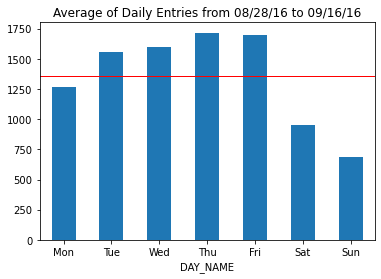

In [380]:
%matplotlib inline

ax = weekday_groups.plot.bar(x='DAY_NAME', y='DAILY_ENTRIES', rot=0, legend=False)
ax.set_title("Average of Daily Entries from {} to {}"
             .format(
                 single_turnstile['DATE'][1].strftime('%D'),
                 single_turnstile['DATE'].iloc[-1].strftime('%D')
             )
            )
ax.axhline(weekday_groups['DAILY_ENTRIES'].mean(), color = 'red', linewidth=1)

From the bars, we can see that the weekends are the quietest days for the stations, implying most people use the MTA to commute to work. 

## Exercise 8

Plot the daily time series for a station.

In [455]:
df_station_daily[df_station_daily['STATION'] == '1 AV']

,STATION,DATE,DAILY_ENTRIES
0,1 AV,08/28/2016,13871.0
1,1 AV,08/29/2016,18064.0
2,1 AV,08/30/2016,19182.0
3,1 AV,08/31/2016,19616.0
4,1 AV,09/01/2016,20170.0
5,1 AV,09/02/2016,20439.0
6,1 AV,09/03/2016,15187.0
7,1 AV,09/04/2016,12951.0
8,1 AV,09/05/2016,11376.0
9,1 AV,09/06/2016,19007.0


In [461]:
single_station_daily = df_station_daily[df_station_daily['STATION'] == '59 ST']


#single_station = single_station.groupby('DATE').sum('DAILY_ENTRIES').reset_index()

In [462]:
single_station_daily.head()

,STATION,DATE,DAILY_ENTRIES
1700,59 ST,08/28/2016,34710.0
1701,59 ST,08/29/2016,68695.0
1702,59 ST,08/30/2016,75162.0
1703,59 ST,08/31/2016,75546.0
1704,59 ST,09/01/2016,75219.0


In [464]:
single_station_daily.shape

(20, 3)

/var/folders/fn/01g6402n52j2vlccb_xrqvgw0000gn/T/ipykernel_26361/2109418969.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=single_station_daily['DATE'], rotation=-25)


Text(0, 0.5, 'Entries')

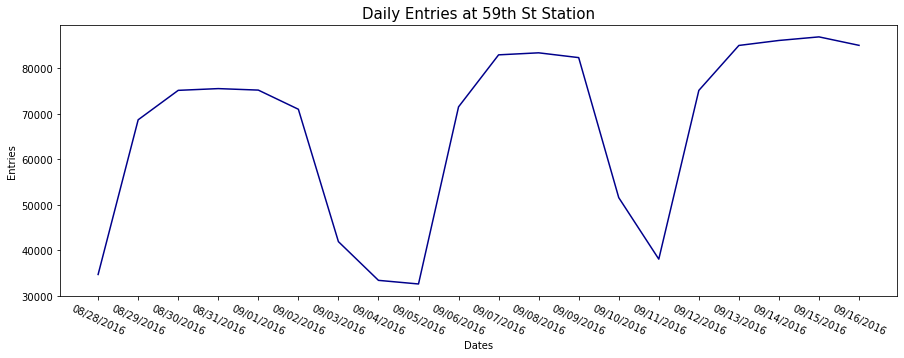

In [465]:
%matplotlib inline

fig, ax = plt.subplots(1, figsize=(15,5))

ax.plot(single_station_daily['DATE'], single_station_daily['DAILY_ENTRIES'], color='darkblue')
ax.set_title('Daily Entries at 59th St Station', fontsize=15)
ax.set_xlabel('Dates')
ax.set_xticklabels(labels=single_station_daily['DATE'], rotation=-25)
ax.set_ylabel('Entries')

## Exercise 9

Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc., so it's a list of 7 counts. Make the same list for another week, and another week, and another week. (hint: pandas datetime day_of_week may be useful)

`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [466]:
single_station_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(single_station_daily['DATE']).dt.dayofweek
single_station_daily['WEEK_OF_YEAR'] = pd.to_datetime(single_station_daily['DATE']).dt.week
single_station_daily.head()

/var/folders/fn/01g6402n52j2vlccb_xrqvgw0000gn/T/ipykernel_26361/891292539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_station_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(single_station_daily['DATE']).dt.dayofweek
/var/folders/fn/01g6402n52j2vlccb_xrqvgw0000gn/T/ipykernel_26361/891292539.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  single_station_daily['WEEK_OF_YEAR'] = pd.to_datetime(single_station_daily['DATE']).dt.week
/var/folders/fn/01g6402n52j2vlccb_xrqvgw0000gn/T/ipykernel_26361/891292539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
1700,59 ST,08/28/2016,34710.0,6,34
1701,59 ST,08/29/2016,68695.0,0,35
1702,59 ST,08/30/2016,75162.0,1,35
1703,59 ST,08/31/2016,75546.0,2,35
1704,59 ST,09/01/2016,75219.0,3,35


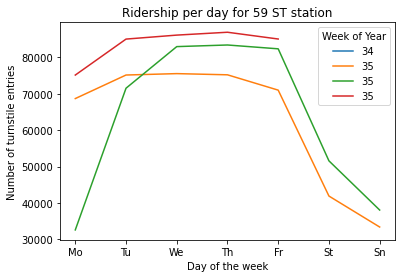

In [486]:
%matplotlib inline

for i, group in single_station_daily.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for {} station'.format(single_station_daily['STATION'].iloc[1]))
plt.legend(single_station_daily['WEEK_OF_YEAR'], title="Week of Year")

### Problem 10

Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)


(array([270.,  61.,  21.,   5.,   5.,   3.,   4.,   2.,   1.,   1.]),
 array([2.5000000e+01, 2.8743270e+05, 5.7484040e+05, 8.6224810e+05,
        1.1496558e+06, 1.4370635e+06, 1.7244712e+06, 2.0118789e+06,
        2.2992866e+06, 2.5866943e+06, 2.8741020e+06]),
 <BarContainer object of 10 artists>)

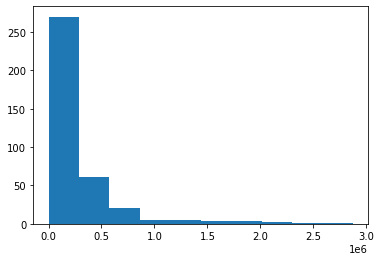

In [488]:
plt.hist(station_totals['DAILY_ENTRIES'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

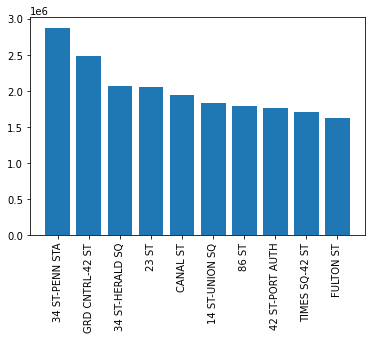

In [496]:
plt.bar(station_totals['STATION'][:10], station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)